<a href="https://colab.research.google.com/github/Fadora/diplomatervezes2024/blob/main/mnist_digitNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cpu')

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)


100%|██████████| 9912422/9912422 [00:00<00:00, 111120733.30it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 17495045.32it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 92723720.22it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 10702544.25it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



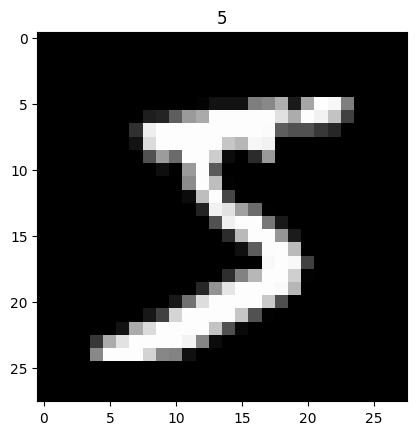

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap = 'gray')
plt.title('%i' % train_data.targets[0])
plt.show()

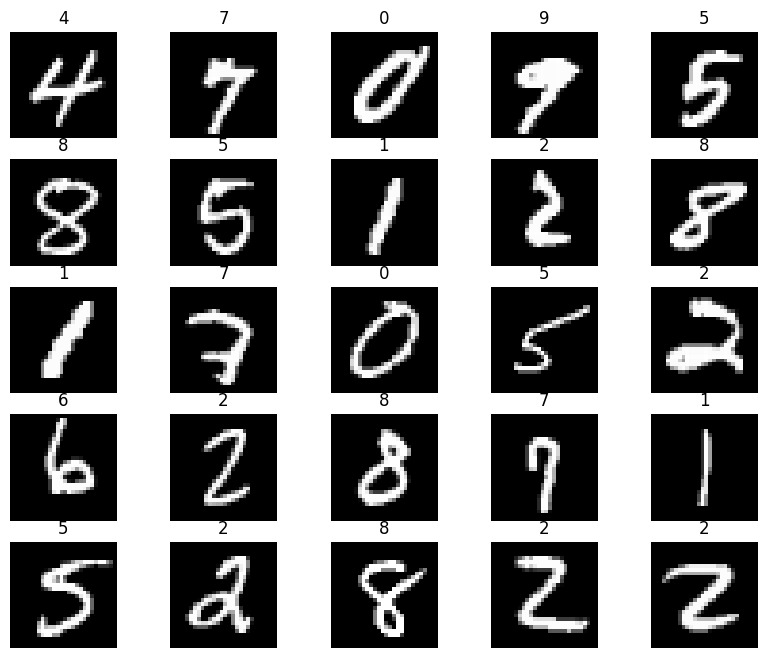

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
from torch.utils.data import DataLoader

loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
    'test' : torch.utils.data.DataLoader(test_data,
                                         batch_size=100,
                                         shuffle=True,
                                         num_workers=1),
}

In [ ]:
import torch.nn as nn

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Sequential(
        nn.Conv2d(
            in_channels=1,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=2,
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )

    self.conv2 = nn.Sequential(
        nn.Conv2d(16, 32, 5, 1, 2),
        nn.ReLU(),
        nn.MaxPool2d(2),
    )

    # fully connected layer, output 10 classes? whatever that means?
    self.out = nn.Linear(32 * 7 * 7, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)

    #flatten the output of conv2 to (batch_size, 32* 7 * 7)
    x = x.view(x.size(0), -1)
    output = self.out(x)
    return output, x



In [ ]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [ ]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [ ]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):

    cnn.train()

    # Train the model
    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                              .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            pass

        pass

    pass
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.0598
Epoch [1/10], Step [200/600], Loss: 0.1013
Epoch [1/10], Step [300/600], Loss: 0.1201
Epoch [1/10], Step [400/600], Loss: 0.1102
Epoch [1/10], Step [500/600], Loss: 0.0465
Epoch [1/10], Step [600/600], Loss: 0.2066
Epoch [2/10], Step [100/600], Loss: 0.0309
Epoch [2/10], Step [200/600], Loss: 0.1515
Epoch [2/10], Step [300/600], Loss: 0.0313
Epoch [2/10], Step [400/600], Loss: 0.0421
Epoch [2/10], Step [500/600], Loss: 0.0152
Epoch [2/10], Step [600/600], Loss: 0.0234
Epoch [3/10], Step [100/600], Loss: 0.0512
Epoch [3/10], Step [200/600], Loss: 0.0863
Epoch [3/10], Step [300/600], Loss: 0.0375
Epoch [3/10], Step [400/600], Loss: 0.0030
Epoch [3/10], Step [500/600], Loss: 0.0141
Epoch [3/10], Step [600/600], Loss: 0.0060
Epoch [4/10], Step [100/600], Loss: 0.0178
Epoch [4/10], Step [200/600], Loss: 0.0114
Epoch [4/10], Step [300/600], Loss: 0.1018
Epoch [4/10], Step [400/600], Loss: 0.0313
Epoch [4/10], Step [500/600], Loss: 0.0155
Epoch [4/10

In [ ]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

    pass
test()

Test Accuracy of the model on the 10000 test images: 1.00


In [ ]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

actual_number = lbls[:10].numpy()
actual_number


array([3, 2, 6, 8, 5, 1, 5, 0, 1, 4])

In [ ]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [3 2 6 8 5 1 5 0 1 4]
Actual number: [3 2 6 8 5 1 5 0 1 4]
